In [1]:
#pip install nltk

In [2]:
import re
import nltk
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 


import warnings
warnings.filterwarnings('ignore')

In [3]:
# nltk.download('stopwords')

# nltk.download(['punkt', 'wordnet'])

# nltk.download('omw-1.4')

In [4]:
vectorizer = TfidfVectorizer()

wordnet = WordNetLemmatizer()

In [5]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [6]:
# Read a table of fixed-width formatted lines into DataFrame.

data = pd.read_fwf('text_to_cluster.txt', names=['text_data'])

In [7]:
data[130:150]

,text_data
130,November 2019 Patch Tuesday: Actively exploited IE zero-day fixed
131,Microsoft Patch Tuesday updates fix CVE-2019-1429 flaw exploited in the wild
132,Microsoft's November 2019 Patch Tuesday arrives with a patch for an IE zero-day
133,Microsoft Patches IE Zero-Day Among 74 Vulnerabilities
134,CVE-2019-11135 - Speculate the Unexpected
135,Marcus Hutchins Gives Advice on BlueKeep (CVE-2019-0708)
136,Critical vulnerability affects Linux Ubuntu and FreeBSD systems
137,Cybersecurity asean security alert multiple vulnerabilities vmware products could allow
138,"Weekly Threat Briefing: Ransomware Attacks In Spain Leave Radio Station In ""Hysteria"""
139,Australian Govt agency ACSC warns of Emotet and BlueKeep attacks


In [8]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
# corpus = []
# for text in data:
#     text = re.sub(re.sub("[^a-zA-Z]", ' ', str(data)))
#     text = text.lower()
#     text = text.split()
#     text = [wordnet.lemmatize(word) for word in text if not word in stopwords('english')]
#     text = " ".join(text)
#     print("text :", text)

#     corpus.append(text)

In [10]:
df = data
df

,text_data
0,"Ransomware attack at Mexico's Pemex halts work, threatens to cripple computers"
1,"#city | #ransomware | Ransomware Attack At Mexico’s Pemex Halts Work, Threatens To Cripple Computers"
2,"Mexico's Pemex Oil Suffers Ransomware Attack, $4.9 Million Demanded"
3,A Mexican oil company was hit by ransomware attack
4,Pemex Struck by Ransomware Attack
5,Mexico’s Pemex Said It Quickly Neutralized Digital Attack
6,Ransomware attack hits Mexican state oil firm Pemex
7,"Ransomware Attack at Mexican State Oil Firm Halts Work, Threatens to Cripple Computers – GetAps.site"
8,Mexican state oil firm Pemex hit by ransomware attack
9,Ransomware attack on the Mexican oil giant Pemex


In [11]:
def preprocess_text(text: str, remove_stopwords: bool):
    text = re.sub("[^A-Za-z]+", " ", text)
    if remove_stopwords:
        
        
        tokens = nltk.word_tokenize(text)
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        text = " ".join(tokens)

        
    text = text.lower().strip()
    return text


In [12]:
df["text_data"] = df["text_data"].apply(lambda y: preprocess_text(y, remove_stopwords= True))

In [13]:
df[130:150]

,text_data
130,november patch tuesday actively exploited ie zero day fixed
131,microsoft patch tuesday updates fix cve flaw exploited wild
132,microsoft november patch tuesday arrives patch ie zero day
133,microsoft patches ie zero day among vulnerabilities
134,cve speculate unexpected
135,marcus hutchins gives advice bluekeep cve
136,critical vulnerability affects linux ubuntu freebsd systems
137,cybersecurity asean security alert multiple vulnerabilities vmware products could allow
138,weekly threat briefing ransomware attacks spain leave radio station hysteria
139,australian govt agency acsc warns emotet bluekeep attacks


## TF-IDF Score

In [14]:
# tfidf_score = vectorizer.fit_transform(df["text_data"]).toarray()
# len(tfidf_score)
# # tfidf_score = tfidf_score.reshape([-1, 1])
# tfidf_score

In [15]:
all_words = [nltk.word_tokenize(sent) for sent in df['text_data']]
all_words

[['ransomware',
  'attack',
  'mexico',
  'pemex',
  'halts',
  'work',
  'threatens',
  'cripple',
  'computers'],
 ['city',
  'ransomware',
  'ransomware',
  'attack',
  'mexico',
  'pemex',
  'halts',
  'work',
  'threatens',
  'cripple',
  'computers'],
 ['mexico',
  'pemex',
  'oil',
  'suffers',
  'ransomware',
  'attack',
  'million',
  'demanded'],
 ['mexican', 'oil', 'company', 'hit', 'ransomware', 'attack'],
 ['pemex', 'struck', 'ransomware', 'attack'],
 ['mexico', 'pemex', 'said', 'quickly', 'neutralized', 'digital', 'attack'],
 ['ransomware', 'attack', 'hits', 'mexican', 'state', 'oil', 'firm', 'pemex'],
 ['ransomware',
  'attack',
  'mexican',
  'state',
  'oil',
  'firm',
  'halts',
  'work',
  'threatens',
  'cripple',
  'computers',
  'getaps',
  'site'],
 ['mexican', 'state', 'oil', 'firm', 'pemex', 'hit', 'ransomware', 'attack'],
 ['ransomware', 'attack', 'mexican', 'oil', 'giant', 'pemex'],
 ['ransomware',
  'attack',
  'mexico',
  'pemex',
  'halts',
  'work',
  'th

In [16]:
# for i in range(len(all_words)):
#     all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]
#     print(all_words[i])

## Word2vec implemetation

In [17]:
#pip install gensim

In [18]:
from gensim.models import Word2Vec

In [19]:
word2vec = Word2Vec(all_words, min_count=2)
word2vec

In [43]:
vocabulary = word2vec.wv.key_to_index # note if I'm giving "KeyedVectors" it is not working attribute error
for i in vocabulary:
    print(i)

ransomware
attack
malware
labour
cyber
party
new
data
hit
breach
net
phishing
pemex
ddos
attacks
oil
provider
service
security
large
smarterasp
uk
hosting
scale
windows
mexican
buran
state
sophisticated
targeted
says
cve
threat
company
cybersecurity
election
mexico
asp
day
firm
patch
digital
emotet
zero
suffers
mass
customers
vulnerability
discount
servers
threatens
work
major
microsoft
halts
massive
researchers
continues
platforms
campaign
computers
bluekeep
hackers
users
hits
tuesday
purelocker
could
found
android
cripple
cyberattack
impact
email
systems
exploited
report
remove
version
os
web
cybercrime
dangerous
protection
quiksilver
billabong
c
cloud
removal
critical
confirms
using
server
apps
warns
latest
system
ie
actor
targets
cisco
xp
mosk
november
raas
radio
station
isro
host
spain
crippled
purcellville
top
check
ahead
scams
virus
exploit
one
likely
access
wild
social
million
affected
weekly
business
alert
code
flaw
bitcoin
point
q
serious
rapidly
kaspersky
expands
getting
unc

In [35]:
v1 = word2vec.wv['official']
v1

array([-9.88573488e-03,  6.49200403e-04,  6.45832159e-03, -1.42372970e-03,
        9.33013577e-03, -6.46063685e-03,  8.55268817e-03,  7.84639176e-03,
        6.72041904e-03,  3.41245951e-03,  4.91482252e-03, -6.22329861e-03,
       -2.54790229e-03,  1.42743869e-03,  5.78202493e-03,  1.25882740e-03,
       -4.99829371e-03, -2.36442988e-03, -7.15304352e-03, -3.04221641e-03,
       -4.45356156e-04, -7.26574566e-03,  3.30463517e-03,  5.68593096e-04,
        1.76269806e-03,  6.87803328e-03,  8.88511771e-04, -4.20851540e-03,
       -4.96937800e-03,  7.06260651e-03,  8.71829689e-03, -7.64621608e-03,
       -3.95855401e-03, -9.08542983e-03, -7.82463513e-03, -4.09247540e-03,
        4.95207147e-04, -7.41552794e-03, -8.96760076e-03,  3.97466403e-03,
        8.84441286e-03,  7.37148291e-03, -3.27377394e-03, -5.30581875e-03,
        3.38287884e-03,  5.40050271e-04,  8.56962334e-03,  1.51850400e-04,
        7.98860751e-03,  5.77551359e-03,  3.79726128e-03, -1.00466823e-02,
       -1.15561136e-03,  

In [36]:
sim_words = word2vec.wv.most_similar('campaign')
sim_words

[('found', 0.5000557899475098),
 ('ransomware', 0.48502498865127563),
 ('data', 0.4840835928916931),
 ('says', 0.4530010223388672),
 ('service', 0.41254252195358276),
 ('threat', 0.41154760122299194),
 ('microsoft', 0.40884456038475037),
 ('security', 0.40764129161834717),
 ('malware', 0.4061535596847534),
 ('phishing', 0.3937283754348755)]

### Transforming the data according to k-means

In [37]:
# vocabulary = vocabulary.toarray().reshape([-1, 1])
# vocabulary

In [38]:
import gensim

In [39]:
m = gensim.models.keyedvectors.Word2VecKeyedVectors(vector_size=300)

In [40]:
m.KeyedVectors = vocabulary
m.vectors = np.array(list(vocabulary.values()))

AttributeError: 'KeyedVectors' object has no attribute 'values'

##  K- Means Algorithm
```from sklearn.cluster import KMeans```

In [41]:
from sklearn.cluster import KMeans  
fig = plt.figure(figsize=(10,8)) 


WCSS = []


for i in range(1, 15):  
    clf = KMeans(n_clusters=i)
    clf.fit(vocabulary)
    WCSS.append(clf.inertia_)
    
    
    
plt.plot(range(1, 15), WCSS)  
plt.title('The Elbow Method')  
plt.ylabel('WCSS')
plt.xlabel('Number Of Clusters') 
plt.show()

ValueError: setting an array element with a sequence.

<Figure size 1000x800 with 0 Axes>

In [ ]:
WCSS

### Fiting the model

In [ ]:
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(tfidf_score)
clusters = kmeans.labels_

In [ ]:
pd.unique(clusters)

In [ ]:
pred_data = kmeans.predict(tfidf_score)
print(pred_data)

In [ ]:
df["lables"] = clusters
df[130:150]

## Okay will do some pridiction now

In [ ]:
test_sent = df["text_data"][135]
test_sent

In [ ]:
vectorized_text = vectorizer.transform([test_sent])
prediction = kmeans.predict(vectorized_text)
print(prediction)

In [ ]:
# Calculate Silhoutte Score
from sklearn.metrics import silhouette_score
#
score = silhouette_score(tfidf_score, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

In [ ]:
# pip install yellowbrick

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(tfidf_score)

### Disadvantages for ~~K-means~~

#### k-mean is very sensitive for ```NOICE or OUTLIER``` that's why we have to use dbscan

## DBSCAN CLUSTERING

###### density-based spatial clustering of applications with noise

It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers). The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.

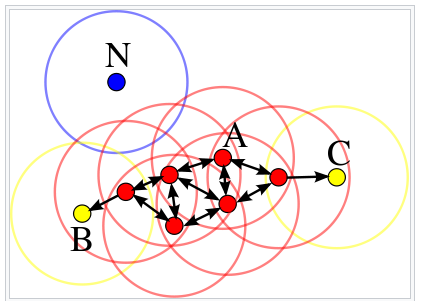

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
clustering = DBSCAN(eps=1.2, min_samples=5).fit(tfidf_score)
dbscan_clusters = clustering.labels_
clustering

In [ ]:
clustering.fit_predict(tfidf_score)

In [ ]:
print(len(pd.unique(dbscan_clusters)))
print(" ")
print(pd.unique(dbscan_clusters))

### Cluster prediction for DBSCAN

In [ ]:
test_sent_dbscan = df["text_data"][683]
test_sent_dbscan

In [ ]:
vectorized_text = vectorizer.transform([test_sent_dbscan])
prediction = clustering.fit_predict(vectorized_text)
print(prediction)

### KeywordProcessor

In [ ]:
# pip install flashtext

In [ ]:
from flashtext import KeywordProcessor

In [ ]:
keyword_processor = KeywordProcessor()

In [ ]:
kyword = pd.read_csv("keywords.csv")

In [ ]:
kyword["keywords"]

### For adding keyword to feed processor

In [ ]:
keyword_processor.add_keyword_from_file("keywords.csv")

In [ ]:
keyword_processor.get_all_keywords()

In [ ]:
# Read a table of fixed-width formatted lines into DataFrame.

testdf = pd.read_fwf('text_to_cluster.txt', names=['sentences'])
testdf

In [ ]:
final_data = pd.concat([testdf, df], axis=1)

In [ ]:
final_data

### For extracting keywords from clustered text

In [ ]:
# CVE regular expression
reg_pattern = r'CVE-\d{4}-\d{4,7}'

In [ ]:
for wrd in final_data["sentences"]:
    pat = re.findall(reg_pattern, wrd)
    
    kywrd_found = keyword_processor.extract_keywords(wrd)
    
    print(pat,kywrd_found)

In [ ]:
count = 0
for w in range(0, len(final_data)):
    
    a = final_data["sentences"][w]
    b = final_data["text_data"][w]
    
    pattern = re.findall(reg_pattern, a)
    d = list(dict.fromkeys(pattern))
    
    for i in d:
        print(i, b)
        count +=1
    
    

In [ ]:
sett = {i: value for key in i for value in final_data["text_data"]}
sett

In [ ]:
i

#### Test code

In [ ]:
count = 0
lists = []
for w in range(0, len(final_data)):
    pattern = re.findall(reg_pattern, final_data["sentences"][w])
    d = list(dict.fromkeys(pattern))
    for i in d:
        #print(dict.fromkeys(i, final_data["text_data"]))
        #print(i, final_data["text_data"][w])
        lists.append(i)    
        count +=1     
    
distss = dict.fromkeys(lists, final_data["text_data"])

In [ ]:
distss

In [ ]:
thisdict

In [ ]:
res = {}
for key in for_visualization:
    for value in final_data["text_data"]:
        res[key] = value
        final_data["text_data"][w].remove(value)
        break

In [ ]:
res

In [ ]:
# Serializing json
json_object = json.dumps(dictionary, indent=4)
 
# Writing to sample.json
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [ ]:
# det = {key:value for i in item(for_visualization) if }
corput = []
for wrd in final_data["sentences"]:
    pat = re.findall(cve_pattern, wrd)
    
    kywrd_found = keyword_processor.extract_keywords(wrd)
    
    if pat and kywrd_found is not None:
        corput.append(wrd,)

In [ ]:
corput

In [ ]:
for wrd in for_visualization["text_data"]:
    
    kywrd_found = keyword_processor.extract_keywords(wrd)

    print(set(kywrd_found))

In [ ]:
for i in for_visualization

In [ ]:
cves = list(dict.fromkeys(cves))

In [ ]:
# print the results to the screen
count = 0
for cve in cves:
    print(cve)
    count += 1

print()
print(str(count) + " CVEs found at " + clusters)
print()

## Trying different codes

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans group clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=clusters, x='x0', y='x1', hue='Cluster', palette="viridis")
plt.show()

In [ ]:
testdf = 'city ransomware ransomware attack mexico pemex halts work threatens cripple computers'

In [ ]:
tfidf_score = vectorizer.fit_transform(testdf).toarray().reshape(-1,1)
tfidf_score

In [ ]:
a # don't run it

In [ ]:
df = 'text_to_cluster.txt'

In [ ]:
class Preprocessing():
    def __init__(self, filepath):
        self.filepath = filepath
        self.stopwords = set(stopwords.words('english'))
        self.regex_patten = r'[^a-zA-Z]'
        self.regex_patten = re.compile(self.regex_patten)

    def readline(self):
        with open(self.filepath, encoding= "utf-8") as input_file:
            return input_file.readlines()

    def cleandata(self, data):
        #data = nltk.sent_tokenize(data)
        corpus = []
        for text in data:
            text = re.sub(self.regex_patten, ' ', str(data))
            text = text.lower()
            text = text.split()
            text = [wordnet.lemmatize(word) for word in text if not word in self.stopwords]
            text = " ".join(text)
            print("text :", text)

            corpus.append(text)
        return corpus


input_filename = df # input("Enter the path of csv or txt file")
preprocessor = Preprocessing(input_filename)
data = preprocessor.readline()
clean_data = preprocessor.cleandata(data)
print(clean_data)





        

In [ ]:
# dff = pd.DataFrame(clean_data)
# dff[0][0]